<a href="https://colab.research.google.com/github/preetikumari1992/Bank-customer-Churn/blob/master/Logistic_regression_for_bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA DICTIONARY**

There are multiple variables in the dataset which can be divided into 3 categories.

# Demographic Information about customers
**customer_id**=customer_id

**vintage**=vintage of the customer with the bank in number of days

**age**=customer age

**gender**=gender of customer

**dependents**=number of dependents

**occupation**=occupation of the customer

**city**=city of the customer(anonymised)

# Customer Bank Relationship
**customer_nw_category**=net worth of customer(3:LOW, 2:Medium, 1:High)

**branch_code**=branch code for customer account

**days_since_last_transaction**=No. of days since credit in last 1 year

# Transactional Information

**current_balance**=balance as of today

**previous_month_end_balance**=End of month balance of previous month

**average_monthly_balance_prevQ**=Average monthly balance in previous quarter

**average_monthly_end_prevQ2**=Average monthly balance in previous to previous quarter

**current_month_credit**=Total credit amount current month

**previous_month_credit**= Total credit amount previous month

**current_month_debit**= Total debit amount current month

**previous_month_debit**=Total debit amount previous month

**current_month_balance**= Total balance of current month

**previous_month_balance**= Total balance of previous month

**churn**= Average balance of customer falls below minimum balance in the next quarter(1/0)



In [48]:
#Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright'])

In [49]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction (1).csv


In [50]:
import io
df = pd.read_csv(io.BytesIO(uploaded['churn_prediction.csv']))


In [51]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [53]:
df.shape

(22067, 21)

In [54]:
df.describe()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000
mean,15115.161372,2547.069334,47.931345,0.391807,0.377487,0.772420,800.318575,2.211991,874.440975,66.934790,7.132589e+03,7.222013e+03,7.181977e+03,6694.966494,3.943065e+03,3.781366e+03,4.070565e+03,3.720333e+03,7.165418e+03,7.182148e+03,0.193683
std,8737.384035,1598.675520,16.393352,0.488165,1.044629,1.033849,431.454448,0.669556,904.244526,84.133427,2.026846e+04,2.105071e+04,1.927121e+04,17101.802052,8.661750e+04,3.254151e+04,5.726446e+04,2.517514e+04,1.959007e+04,2.097682e+04,0.395192
min,1.000000,180.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7522.500000,1321.000000,36.000000,0.000000,0.000000,0.000000,409.000000,2.000000,159.000000,11.000000,1.784445e+03,1.906485e+03,2.209835e+03,1817.980000,3.600000e-01,3.700000e-01,4.700000e-01,4.900000e-01,2.029970e+03,2.090665e+03,0.000000
50%,15120.000000,2202.000000,46.000000,0.000000,0.000000,0.000000,848.000000,2.000000,531.000000,28.000000,3.335440e+03,3.426740e+03,3.592880e+03,3380.690000,1.130000e+00,6.440000e+00,2.147300e+02,2.285000e+02,3.501740e+03,3.508160e+03,0.000000
75%,22685.500000,3370.000000,60.000000,1.000000,0.000000,2.000000,1096.000000,3.000000,1374.000000,90.000000,6.801310e+03,6.826095e+03,6.819235e+03,6628.750000,9.937800e+02,1.129115e+03,1.579220e+03,1.643175e+03,6.858385e+03,6.779355e+03,0.000000
max,30301.000000,11353.000000,90.000000,1.000000,52.000000,4.000000,1649.000000,3.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.074625e+06,1.326487e+06,1.000000


In [55]:
#dropping missing values

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [56]:
#Checking target variable distribution is whether balanced or imbalanced type.

df['churn'].value_counts()/len(df)

0    0.806317
1    0.193683
Name: churn, dtype: float64

Target variable classes are imbalanced (80:20)

In [57]:
#Separating Dependent & Independent variables
X=df.drop(columns=['churn', 'customer_id'])
Y=df['churn']

In [58]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [59]:
#Train test split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test=tts(scaled_X, Y, train_size=0.80)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## **Model building/prediction & odds ratio**

In [60]:
#Building Logistic Regression

from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')

In [61]:
#Fitting trained data and making predictions 
#Looking for 2 results: predicted values & predicted probabilities

classifier.fit(X_train, Y_train)
predicted_values=classifier.predict(X_test)
predicted_probabilities=classifier.predict_proba(X_test)

In [62]:
predicted_values

array([0, 0, 0, ..., 0, 1, 0])

In [63]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.74658757, 0.25341243],
        [0.50986942, 0.49013058],
        [0.5752713 , 0.4247287 ],
        ...,
        [0.62198438, 0.37801562],
        [0.4623675 , 0.5376325 ],
        [0.51416285, 0.48583715]]), (4414, 2))

Column 1 represents probability of class-0

Column 2 represents probability of class-1

# **Evaluating** **Logistic** **Regression** **model**

In [64]:
#Calculating Accuracy matrix
classifier.score(X_test, Y_test)

0.7299501585863163

It is a fair value which tells us accuracy of our model, but our target variable is Imbalanced data hence, it is not correct to calculate accuracy matrix.

In [65]:
#Calculating Precision score
from sklearn.metrics import precision_score
Precision=precision_score(Y_test, predicted_values)
Precision

0.3835616438356164

It tells us 37% of predicted values have been predicted False Positive.

In [66]:
#Calculating Recall matrix
from sklearn.metrics import recall_score
Recall=recall_score(Y_test, predicted_values)
Recall

0.6572769953051644

It tells us that only 63% of predicted values have been predicted as positives.

In [67]:
#TO solve conflict among choosing precision or recall matrix we call for F1 score matrix.
#Calculating F! score manually.
f1=2/((1/Precision)+(1/Recall))
f1

0.4844290657439447

In [68]:
#Calculating F1 using sklearn library
from sklearn.metrics import f1_score
F1=f1_score(Y_test, predicted_values)
F1

0.48442906574394473

F1 score is same for both methods above. If F1< 0.50 , so our model is far from to be a good model.

In [69]:
#Calculating all matrix at once using Support function.
#Support function return metrics w.r.t class 0 & 1
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support=PRF_summary(Y_test, predicted_values)

In [70]:
#PRINT
precision

array([0.90115098, 0.38356164])

In [71]:
recall

array([0.74733296, 0.657277  ])

In [72]:
f1

array([0.81706568, 0.48442907])

1st column- prob of class 0

2nd column- prob of class 1

Support function doesn't give us very intuitive representation.

In [73]:
#For better representation using a structured function.
from sklearn.metrics import classification_report
k=classification_report(Y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3562
           1       0.38      0.66      0.48       852

    accuracy                           0.73      4414
   macro avg       0.64      0.70      0.65      4414
weighted avg       0.80      0.73      0.75      4414



# **Precision-Recall Curve for their Trade-Off**

In [75]:
#Gathering Precision/Recall scores for different Thresholds.
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points=precision_recall_curve(Y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((4412,), (4412,), (4411,))

This curve will show every possible threshold values b/w probability 0 & 1.

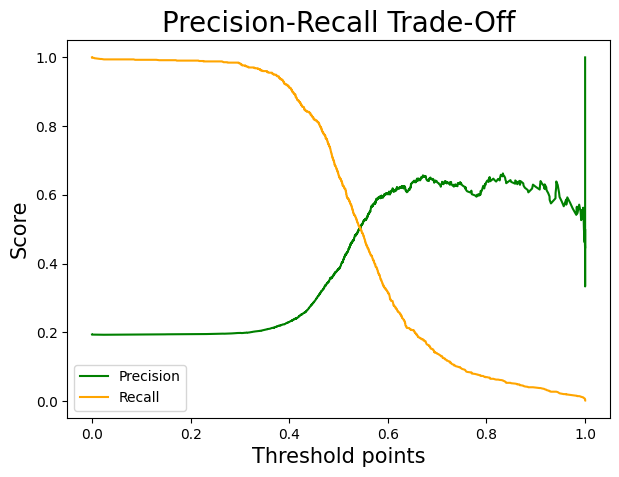

In [76]:
#Plotting curve.
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points, precision_points[:-1], color='green', label='Precision')
plt.plot(threshold_points, recall_points[:-1], color='orange', label='Recall')
plt.title('Precision-Recall Trade-Off', fontsize=20)
plt.xlabel('Threshold points', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.legend()

Trade off curve showing as precision increases, recall decreases as well. Our threshold point is intersection point at 0.56 i.e. a great threshold value for our model.

# **AUC-ROC Curve**

In [77]:
#plotting auc-roc curve to measure model performance.
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold=roc_curve(Y_test, predicted_probabilities[:,1])


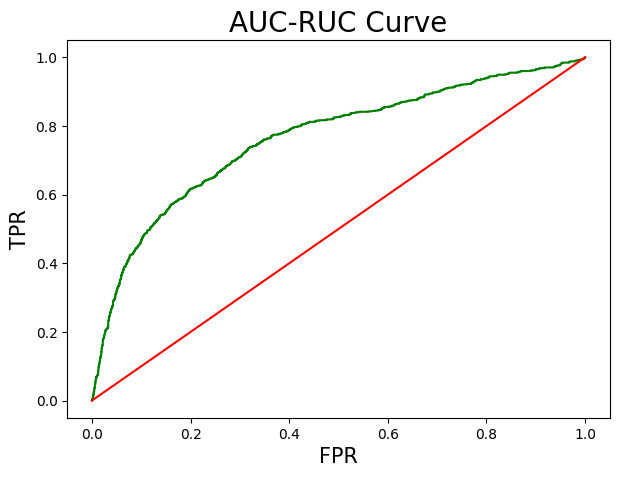

0.7633730984070246

In [79]:
#Plotting curve
plt.figure(figsize=(7,5), dpi=100)
plt.plot(fpr, tpr, color='green')
plt.plot([0,1], [0,1], label='baseline', color='red')
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('AUC-RUC Curve', fontsize=20)
plt.show()

#Plot area under curve

roc_auc_score(Y_test, predicted_probabilities[:,1])

ROC value 0.76 >0.55(threshold) shows Average results which can be further improve by feature engineering.

# **Coeff- Plot**

In [81]:
#Coeff-plot tell us how the target var of our model is depending upon all independent variables.
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({'coefficients':c,
                         'variable':x})

#sorting the  values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
9,-1.999611,current_balance
0,-0.169002,vintage
14,-0.151003,previous_month_credit
10,-0.143793,previous_month_end_balance
8,-0.112023,days_since_last_transaction


Text(0.5, 1.0, 'Coeff Plot')

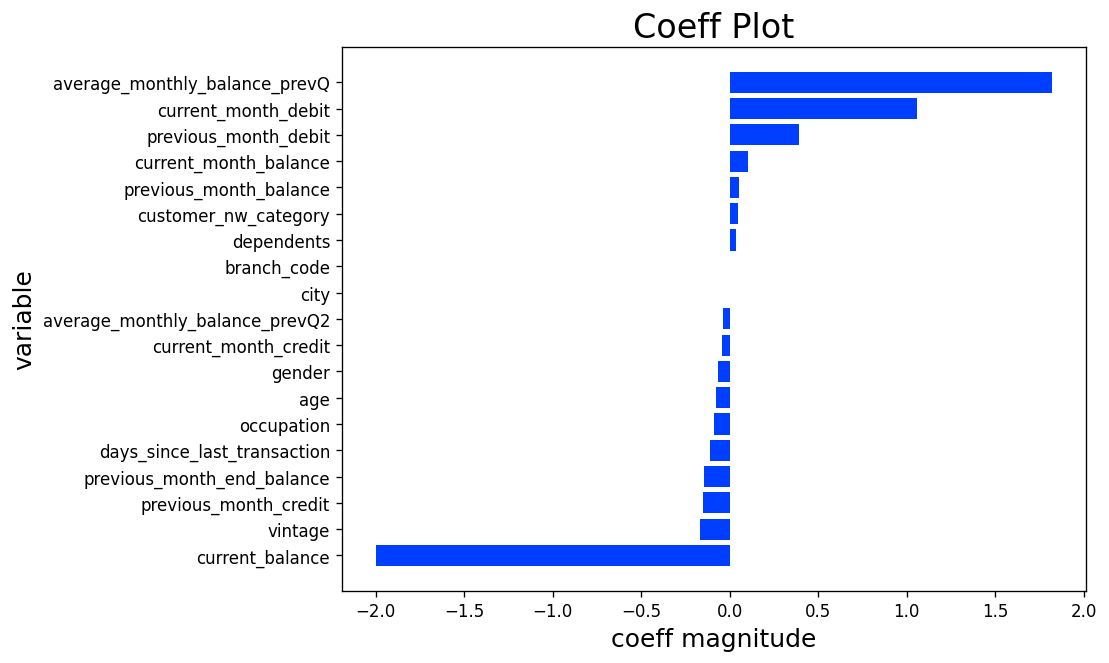

In [83]:
#plotting
plt.figure(figsize=(8,6), dpi=120)
plt.barh(coeff_plot['variable'], coeff_plot['coefficients'])
plt.xlabel('coeff magnitude', fontsize=15)
plt.ylabel('variable', fontsize=15)
plt.title('Coeff Plot', fontsize=20)

# **RESULT**

Higher the values of **average_monthly_balance_prevQ, current_month_debit & previous_month_debit, customer is more likely to churn**.


Higher the values of **current_balance, customer is less likely to churn**.
